In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Obtener y mostrar los datos
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_diabetes['target'] = diabetes.target
print(df_diabetes.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [3]:
df_diabetes.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [5]:
X=df_diabetes[['bmi']]
#X

In [6]:
target=df_diabetes[['target']]
#target

In [9]:
#Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=20, shuffle=False)

In [10]:
#Ajustar el modelo de regresión múltiple
model = LinearRegression()
model.fit(X_train,y_train) #entrenar el modelo
#y_pred
target_test_pred = model.predict(X_test)
target_train_pred=model.predict(X_train)


In [12]:
#coeficientes
print(f"Coeficientes: {model.coef_}")
print(f"Mean squared error test: {mean_squared_error(y_test, target_test_pred):.2f}")
#print(f"Mean squared error train: {mean_squared_error(y_train, target_train_pred):.2f}")
#print(f"Coefficient of determination train(R2): {model.score(X_train, y_train):.2f}")
print(f"Coefficient of determination test(R2): {model.score(X_test, y_test):.2f}")

Coeficientes: [[938.23786125]]
Mean squared error test: 2548.07
Coefficient of determination test(R2): 0.47


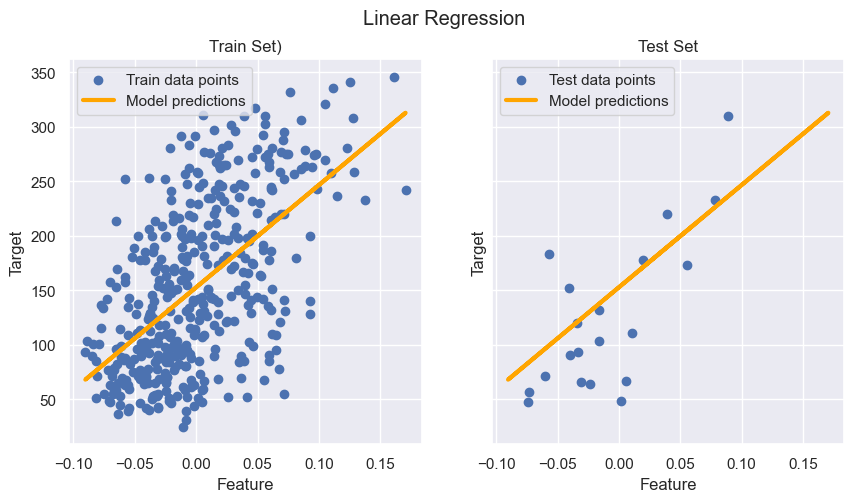

In [16]:
sns.set_theme()
fig, ax=plt.subplots(ncols=2,figsize=(10,5), sharex=True,sharey=True)
ax[0].scatter(X_train,y_train,label="Train data points")
ax[0].plot(X_train, model.predict(X_train), color='orange', linewidth=3, label="Model predictions")
ax[0].set_title('Train Set)')
ax[0].set_xlabel('Feature')
ax[0].set_ylabel('Target')
ax[0].legend()
#Grafica 2
ax[1].scatter(X_test, y_test, label="Test data points")
ax[1].plot(X_train, model.predict(X_train), color='orange', linewidth=3, label="Model predictions")
ax[1].set_title('Test Set')
ax[1].set_xlabel('Feature')
ax[1].set_ylabel('Target')
ax[1].legend()
plt.suptitle('Linear Regression')
#plt.tight_layout()
plt.show()

**Conclusión**
La relación entre el IMC y la progresion de la diabetes es moderada, explicando el 47% de los datos. Si bien se puede ver una tendencia en losd atos, el error cuadratico elevado indica que faltan variables a considerar.